In [5]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf

In [33]:
data1 = pd.read_csv("NewspaperData.csv")
data1

,Newspaper,daily,sunday
0,Baltimore Sun,391.952,488.506
1,Boston Globe,516.981,798.298
2,Boston Herald,355.628,235.084
3,Charlotte Observer,238.555,299.451
4,Chicago Sun Times,537.780,559.093
5,Chicago Tribune,733.775,1133.249
6,Cincinnati Enquirer,198.832,348.744
7,Denver Post,252.624,417.779
8,Des Moines Register,206.204,344.522
9,Hartford Courant,231.177,323.084


In [35]:
data1.isnull().sum()

Newspaper    0
daily        0
sunday       0
dtype: int64

In [37]:
data1.describe()

,daily,sunday
count,34.000000,34.000000
mean,430.962471,591.202412
std,269.211470,376.418051
min,133.239000,202.614000
25%,233.021500,327.769500
50%,355.235500,436.712500
75%,516.616500,699.735250
max,1209.225000,1762.015000


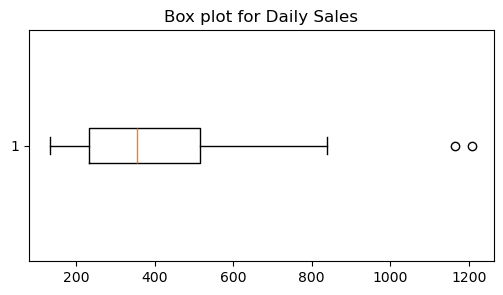

In [41]:
plt.figure(figsize=(6,3))
plt.title("Box plot for Daily Sales")
plt.boxplot(data1["daily"], vert = False)
plt.show()

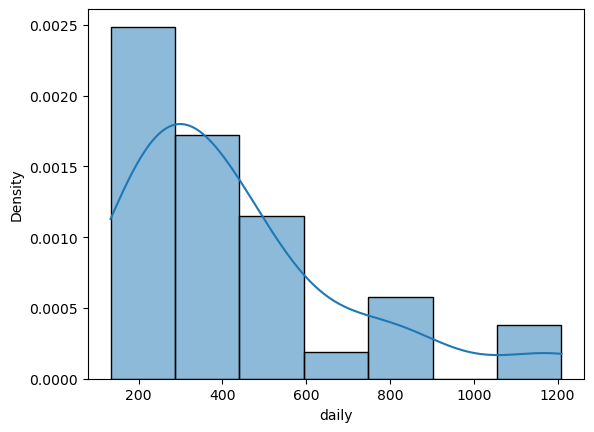

In [43]:
sns.histplot(data1['daily'], kde = True,stat='density',)
plt.show()

## Observations
- The are no missing values
- The daily column values appears to be right-skewed
- The sunday column values also appears to be right-skewed
- There are two outliers in both daily column and also in sunday column as observed from the boxplots

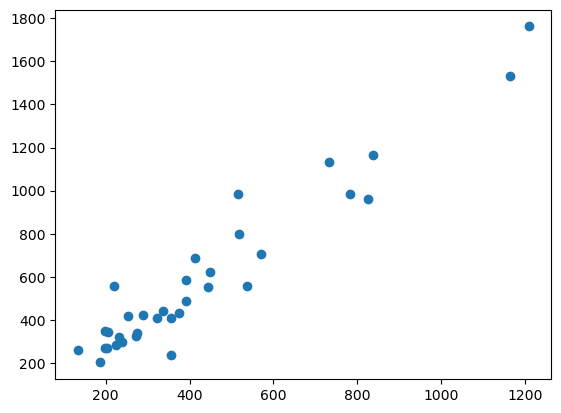

In [48]:
x= data1["daily"]
y = data1["sunday"]
plt.scatter(data1["daily"], data1["sunday"])

In [50]:
data1["daily"].corr(data1["sunday"])

0.9581543140785462

In [52]:
data1[["daily","sunday"]].corr()

,daily,sunday
daily,1.000000,0.958154
sunday,0.958154,1.000000
